# INTRODUCTION

This case study is the Capstone Project of the **Google Data Analytics Professional Certificate**. The **6 steps of Data Analysis** are used to present this analysis. These steps include **Ask**, **Prepare**, **Process**, **Analyze**, **Share**, and **Act**. 

Title: **Cyclistic Case Study**

Author: Abdullahi Mohamed

Date: 3 April 2025


![](cyclistic.png)

## Cyclistic: How Does a Bike-Share Navigate Speedy Success?

## STEP 1: Ask

####  1.0 Background
Cyclistic is a bike-share company located in Chicago. Since 2016, Cyclistic has grown to a fleet of over 5000 bicycles located across over 600 stations. The bikes can be unlocked from one station and returned to any other station in the system anytime. 
The director of marketing, Lily Moreno, believes that an analysis of Cyclistic historical bike trip data would reveal key insights for future revenue growth. 

#### 1.2 Business Task

Goal: Analyze Cyclistic historical bike trip data to gain insights on how casual riders and annual members use bikes differently and support the marketing strategy aimed at converting casual riders to annual members. 

#### 1.3 Business Objectives
1. How do annual members and casual riders use Cyclistic bikes dierently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?

#### 1.4 Deliverables:
1. A clear statement of the business task
2. A description of all data sources used
3. Documentation of any cleaning or manipulation of data
4. A summary of your analysis
5. Supporting visualizations and key findings
6. Your top three recommendations based on your analysis

#### 1.5 Key Stakeholders
1. Lily Moreno: Director of Marketing 
2. Cyclistic marketing analytics team: A team of data analysts responsible for collecting, analyzing, and reporting data that helps guide Cyclistic's marketing strategy. 
3. Cyclistic executive team: A team of executives that will decide whether to approve the recommended marketing program. 
---

## STEP 2: Prepare

#### 2.1 Information on Data Source
The data used for analysis was collected by Cyclistic (through Motivate International Inc) and is located on their public website. The historical trip data was organized by month and year dating back to May 2022. The data was saved as CSV files within zip folders. Each file contained information on the following fields: 
1. ride_id: a unique ID per ride
2. rideable_type: the type of bicycle used
3. started_at: the date and time that the bicycle was checked out
4. ended_at: the date and time that the bicycle was checked in
5. start_station_name: the name of the station at the start of the trip
6. start_station_id: a unique identifier for the start station
7. end_station_name: the name of the station at the end of the trip
8. end_station_id : a unique identifier for the end station
9. start_lat: the latitude of the start station
10. start_lng: the longitude of the start station
11. end_lat: the latitude of the end station
12. end_lng: the longitude of the end station
13. member_casual: a field indicating whether the rider is a causal or member

#### 2.2 Limitations of Dataset
1. The data is collected from the May 2022 to April 2023. Since this data is over 3 years old, rider's habits and trip frequency may have changed. The data set may not be timely and relevant to find accurate reccommendations for the marketing team's campaign.

#### 2.3 Is Data ROCCC?
A good data source is **ROCCC** which stands for **R**eliable, **O**riginal, **C**omprehensive, **C**urrent, and **C**ited. 
1. Reliable - LOW - Data is collected from a third party (Motivate International Inc), therefore reliability is unknown.
2. Original - LOW - Datasets are provided by a third-party.
3. Comprehensive - HIGH - Variables can be used to answer the business task.
4. Current - LOW - Data is 3 years old and is not relevant. 
5. Cited - LOW - Unknown since the data is collected by a third-party.

Overall, the dataset is considered bad quality and any insights gathered from this data should not be used to produce business recommendations. 

#### 2.4 Data Selection:

The following file is selected and copied for analysis.   

   - biketrips_merged.csv

---

## STEP 3: Process

#### 3.1 Preparing the Environment
The `numPy, Pandas, matplotlib, datetime` packages are imported and aliased. 

In [27]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import datetime as dt 

#### 3.2 Importing dataset
Reading in the selected file.


In [28]:
#read_csv fucntion to read the required CSV file
bike_trips = pd.read_csv(r'C:\Users\abdul\Downloads\Cyclistic Datasets\CSV\biketrips_merged.csv')

#### 3.3 Data cleaning and manipulation

**Steps**
1. Explore the data
2. Check for missing or null values.
3. Remove duplicate data. 
3. Ensure the data is consistant and standardized. 

Previewing the data using `.head(10)`.

In [29]:
# Preview the first 10 rows of the data set
bike_trips.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,EC2DE40644C6B0F4,classic_bike,2022-05-23 23:06:58,2022-05-23 23:40:19,Wabash Ave & Grand Ave,TA1307000117,Halsted St & Roscoe St,TA1309000025,41.891466,-87.626761,41.943670,-87.648950,member
1,1C31AD03897EE385,classic_bike,2022-05-11 08:53:28,2022-05-11 09:31:22,DuSable Lake Shore Dr & Monroe St,13300,Field Blvd & South Water St,15534,41.880958,-87.616743,41.886349,-87.617517,member
2,1542FBEC830415CF,classic_bike,2022-05-26 18:36:28,2022-05-26 18:58:18,Clinton St & Madison St,TA1305000032,Wood St & Milwaukee Ave,13221,41.882242,-87.641066,41.907655,-87.672552,member
3,6FF59852924528F8,classic_bike,2022-05-10 07:30:07,2022-05-10 07:38:49,Clinton St & Madison St,TA1305000032,Clark St & Randolph St,TA1305000030,41.882242,-87.641066,41.884576,-87.631890,member
4,483C52CAAE12E3AC,classic_bike,2022-05-10 17:31:56,2022-05-10 17:36:57,Clinton St & Madison St,TA1305000032,Morgan St & Lake St,TA1306000015,41.882242,-87.641066,41.885779,-87.651025,member
5,C0A3AA5A614DCE01,classic_bike,2022-05-04 14:48:55,2022-05-04 14:56:04,Carpenter St & Huron St,13196,Sangamon St & Washington Blvd,13409,41.894556,-87.653449,41.883165,-87.651100,member
6,F2AF43A242DF4555,classic_bike,2022-05-27 12:41:48,2022-05-27 12:50:41,Noble St & Milwaukee Ave,13290,Wood St & Augusta Blvd,657,41.900680,-87.662600,41.899181,-87.672200,member
7,377BE1F5F0E399CA,docked_bike,2022-05-29 19:19:24,2022-05-29 19:31:34,Halsted St & Wrightwood Ave,TA1309000061,Southport Ave & Clybourn Ave,TA1309000030,41.929143,-87.649077,41.920771,-87.663712,casual
8,B136E0C969773F59,classic_bike,2022-05-16 17:48:44,2022-05-16 18:05:26,Clinton St & Madison St,TA1305000032,Clybourn Ave & Division St,TA1307000115,41.882242,-87.641066,41.904613,-87.640552,member
9,75F6A50A05E0AA18,electric_bike,2022-05-11 07:29:29,2022-05-11 07:30:57,Southport Ave & Waveland Ave,13235,N Southport Ave & W Newport Ave,20257.0,41.948067,-87.664012,41.940000,-87.660000,member


Checking the datatype for our variables using `.info()`. 

In [30]:
bike_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5859061 entries, 0 to 5859060
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 581.1+ MB


Dropping duplicate values from our data set using`.drop_duplicates()`.

In [59]:
bike_trips = bike_trips.drop_duplicates()

(5859061, 13)

Checking for columns with missing values using `isnull().sum()`. 

In [31]:
missing_value_counts = bike_trips.isnull().sum()

missing_value_counts

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    832009
start_station_id      832141
end_station_name      889661
end_station_id        889802
start_lat                  0
start_lng                  0
end_lat                 5973
end_lng                 5973
member_casual              0
dtype: int64

Variables start_station_name, start_station_id, end_station_name, end_station_id, end_lat_ and end_lng are missing values. Since the size of our data set is large (> 5 million rows), removing rows with missing data will not have a significant impact on our data set. 

In [32]:
# Drop the rows with missings values using .dropna and create a new data set
bike_tripsclean = bike_trips.dropna().copy()

In [33]:
# Confirm that all null values have been removed
missing_value_counts = bike_tripsclean.isnull().sum()

print(missing_value_counts)

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64


The datatype for `started_at` and `ended_at` are objects and need to be changed to datetime with `pd.to_datetime()`. 

In [34]:
# Changed the data type of started_at & ended_at from an object type to a date data type using pd.to_datetime.
bike_tripsclean['started_at'] = pd.to_datetime(bike_tripsclean['started_at'])
bike_tripsclean['ended_at'] = pd.to_datetime(bike_tripsclean['ended_at'])

In [35]:
bike_tripsclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4533999 entries, 0 to 5859060
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 484.3+ MB


Creating a trip duration variable from the difference between start time and the end time. Converted the trip duration variable to minutes. 

In [36]:
bike_tripsclean['trip_duration'] = round((bike_tripsclean['ended_at'] - bike_tripsclean['started_at']).dt.total_seconds() / 60, 3)

In [37]:
bike_tripsclean['trip_duration'].describe()

count    4.533999e+06
mean     1.656031e+01
std      3.622338e+01
min     -1.687000e+02
25%      5.867000e+00
50%      1.030000e+01
75%      1.846700e+01
max      3.203545e+04
Name: trip_duration, dtype: float64

A negative minimum value for the trip duration suggests that an error in the `started_at` and `ended_at` variables for certain riders. Likewise, a maximum value of over 22 days suggests an error as well. To ensure that the data we are analyzing is accurate and consistent, all values with a `trip_duration` below 1 minute and above 24 hours will be removed from this data set. 

In [38]:
bike_tripsclean = bike_tripsclean[(bike_tripsclean['trip_duration'] > 1) & (bike_tripsclean['trip_duration'] < 1440)].copy()

In [39]:
bike_tripsclean['trip_duration'].describe()

count    4.443425e+06
mean     1.683965e+01
std      3.083247e+01
min      1.017000e+00
25%      6.083000e+00
50%      1.051700e+01
75%      1.873300e+01
max      1.439367e+03
Name: trip_duration, dtype: float64

Adding a `month` and `day_of_week` column to the data set. 

In [40]:
# Adding the month column by extracting from date variables

bike_tripsclean['month'] = bike_tripsclean['started_at'].dt.strftime('%B')

In [41]:
# Adding the day_of_week column by extracting from date variables
bike_tripsclean['day_of_week'] = bike_tripsclean['started_at'].dt.strftime('%A')

In [42]:
bike_tripsclean.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration,month,day_of_week
0,EC2DE40644C6B0F4,classic_bike,2022-05-23 23:06:58,2022-05-23 23:40:19,Wabash Ave & Grand Ave,TA1307000117,Halsted St & Roscoe St,TA1309000025,41.891466,-87.626761,41.943670,-87.648950,member,33.350,May,Monday
1,1C31AD03897EE385,classic_bike,2022-05-11 08:53:28,2022-05-11 09:31:22,DuSable Lake Shore Dr & Monroe St,13300,Field Blvd & South Water St,15534,41.880958,-87.616743,41.886349,-87.617517,member,37.900,May,Wednesday
2,1542FBEC830415CF,classic_bike,2022-05-26 18:36:28,2022-05-26 18:58:18,Clinton St & Madison St,TA1305000032,Wood St & Milwaukee Ave,13221,41.882242,-87.641066,41.907655,-87.672552,member,21.833,May,Thursday
3,6FF59852924528F8,classic_bike,2022-05-10 07:30:07,2022-05-10 07:38:49,Clinton St & Madison St,TA1305000032,Clark St & Randolph St,TA1305000030,41.882242,-87.641066,41.884576,-87.631890,member,8.700,May,Tuesday
4,483C52CAAE12E3AC,classic_bike,2022-05-10 17:31:56,2022-05-10 17:36:57,Clinton St & Madison St,TA1305000032,Morgan St & Lake St,TA1306000015,41.882242,-87.641066,41.885779,-87.651025,member,5.017,May,Tuesday
5,C0A3AA5A614DCE01,classic_bike,2022-05-04 14:48:55,2022-05-04 14:56:04,Carpenter St & Huron St,13196,Sangamon St & Washington Blvd,13409,41.894556,-87.653449,41.883165,-87.651100,member,7.150,May,Wednesday
6,F2AF43A242DF4555,classic_bike,2022-05-27 12:41:48,2022-05-27 12:50:41,Noble St & Milwaukee Ave,13290,Wood St & Augusta Blvd,657,41.900680,-87.662600,41.899181,-87.672200,member,8.883,May,Friday
7,377BE1F5F0E399CA,docked_bike,2022-05-29 19:19:24,2022-05-29 19:31:34,Halsted St & Wrightwood Ave,TA1309000061,Southport Ave & Clybourn Ave,TA1309000030,41.929143,-87.649077,41.920771,-87.663712,casual,12.167,May,Sunday
8,B136E0C969773F59,classic_bike,2022-05-16 17:48:44,2022-05-16 18:05:26,Clinton St & Madison St,TA1305000032,Clybourn Ave & Division St,TA1307000115,41.882242,-87.641066,41.904613,-87.640552,member,16.700,May,Monday
9,75F6A50A05E0AA18,electric_bike,2022-05-11 07:29:29,2022-05-11 07:30:57,Southport Ave & Waveland Ave,13235,N Southport Ave & W Newport Ave,20257.0,41.948067,-87.664012,41.940000,-87.660000,member,1.467,May,Wednesday


#### 3.4 Summary of data cleaning steps

1. Removed null values from data set using the .dropna fuction.
2. Removed duplicate rows. 
3. Changed the data type of started_at and ended_at variables from object to datetime using pd.ti_datetime. 
4. Added 3 new columns: trip_duration, month, and day_of_week. 
5. Removed rows with a trip_duration less than 1 minute and greater than 24 hours. 

## STEP 4: Analyze

#### Perform calculations

Finding the average trip duration for casual riders and members. 

In [61]:
# Average trip duration grouped my membership status. 

bike_tripsclean.groupby(['member_casual'])['trip_duration'].mean()

member_casual
casual    23.430949
member    12.511454
Name: trip_duration, dtype: float64

 Counting the number of riders by membership status. 

In [60]:
# Count of riders by membership status. 

bike_tripsclean['member_casual'].value_counts()

bike_tripsclean['member_casual'].value_counts(normalize=True) * 100

member    60.362648
casual    39.637352
Name: member_casual, dtype: float64

Count of total monthly rides by membership status.

In [47]:
# Count of total monthly rides by membership status. 

bike_tripsclean.groupby(['member_casual'])['month'].value_counts()

member_casual  month    
casual         July         306526
               June         287502
               August       265702
               September    217445
               May          216898
               October      148840
               April        108137
               November      72355
               March         45728
               February      32137
               December      30972
               January       29014
member         August       328513
               July         324245
               June         322209
               September    307779
               May          277114
               October      257407
               April        206710
               November     178724
               March        148771
               January      115413
               February     113677
               December     101607
Name: month, dtype: int64

Count of total daily rides by membership status (Monday to Sunday). 

In [62]:
# Count of total daily rides by membership status. 

bike_tripsclean.groupby(['member_casual'])['day_of_week'].value_counts()

member_casual  day_of_week
casual         Saturday       356689
               Sunday         296551
               Friday         257058
               Thursday       234160
               Wednesday      209103
               Monday         206762
               Tuesday        200933
member         Wednesday      430931
               Thursday       430049
               Tuesday        424563
               Monday         377488
               Friday         376584
               Saturday       338994
               Sunday         303560
Name: day_of_week, dtype: int64

In [49]:
bike_tripsclean.groupby(['member_casual'])['month'].value_counts()

bike_tripsclean.groupby(['member_casual'])['rideable_type'].value_counts(normalize=True) * 100

member_casual  rideable_type
casual         classic_bike     49.700498
               electric_bike    40.861465
               docked_bike       9.438037
member         classic_bike     64.263288
               electric_bike    35.736712
Name: rideable_type, dtype: float64

## STEP 5: Share

### 5.1 Supporting Visualizations and Findings

Exporting the dataset into a csv file to load into Power BI desktop. 

In [46]:
# Exporting the datset into a csv file. 
bike_tripsclean.to_csv('bike_tripsclean', index=False)

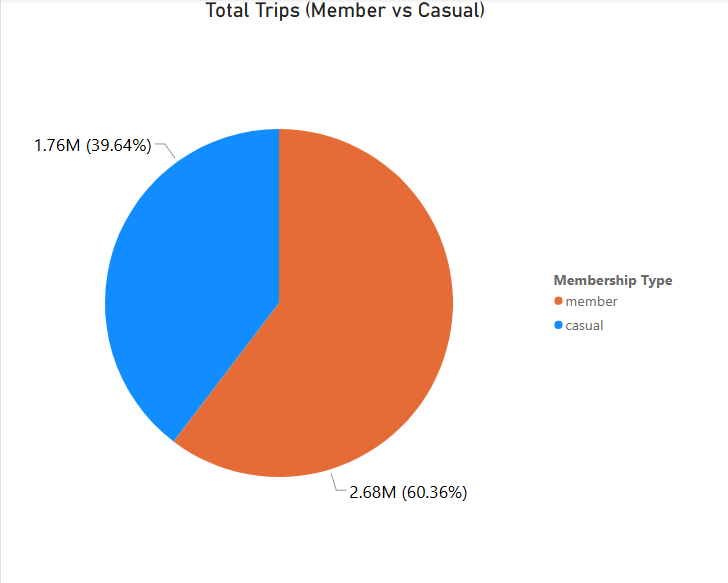

#### Total Trips by Membership Type

1. Riders with an **annual membership** comprised **60.4%** of all trips between May 2022 and April 2023. 
2. **Casual** riders comprised **39.6%** of all trips between May 2022 and April 2023. 

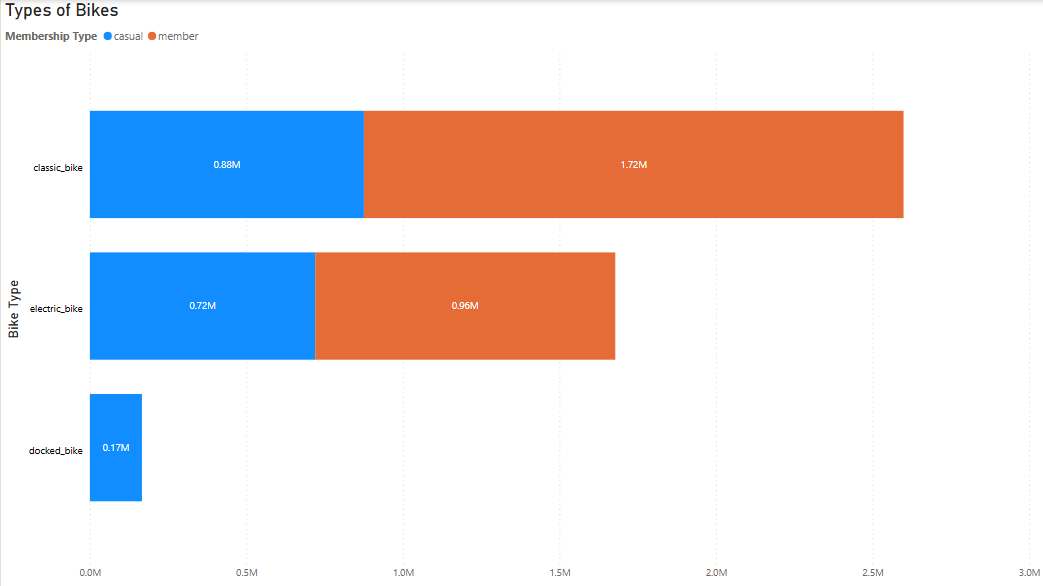

#### Types of Bikes by Membership Type

1. The **classic bike** was the prefered bike for most riders followed by **electric bike** and **docked bike**. 
2. The **docked bike** was only used by casual riders. 
3. Members prefered to use the **classic bike** over the **electric bike** (1.72 million > 0.96 million). 

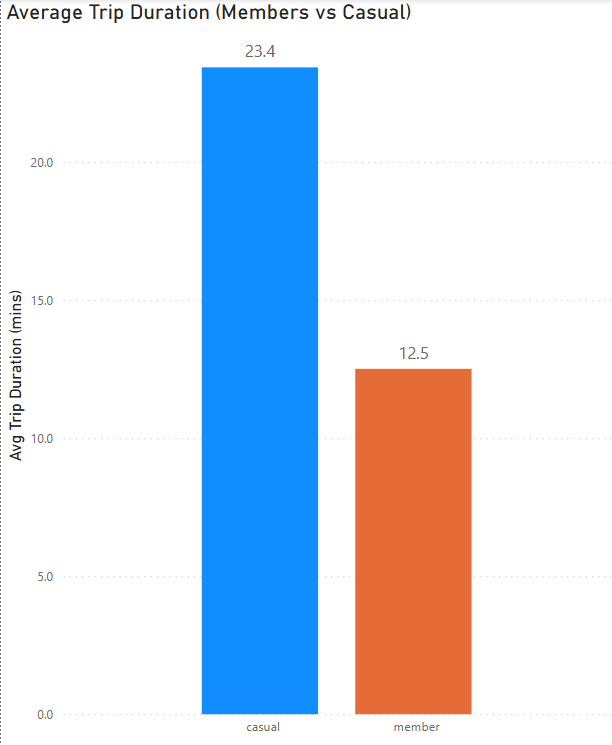

#### Average Trip Duration for Riders

1. The average trip duration for members and casual riders was **12.5** minutes and **23.4** minutes respectively. 
2. Casual riders take **less trips** than members, but have **longer trips** on average. 

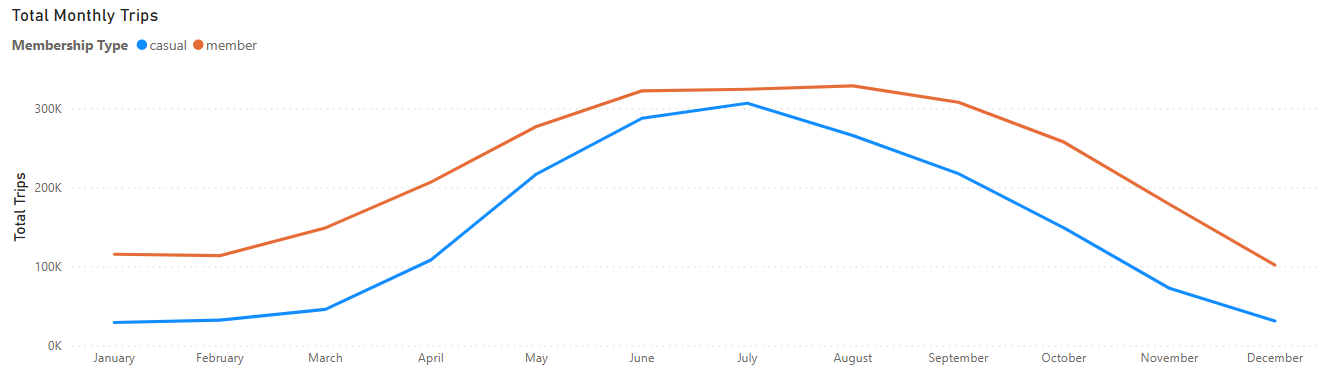

#### Total Monthly Trips

1. The highest volume of trips were taken in the summer months (June, July, & August). As the weather improves, riders are more likely to use bikes for recreation, leisure, or comutting to work. 
2. Both casual riders and members tend to follow the same monthly trip trend with more rides in the summer and less rides in the winter. 

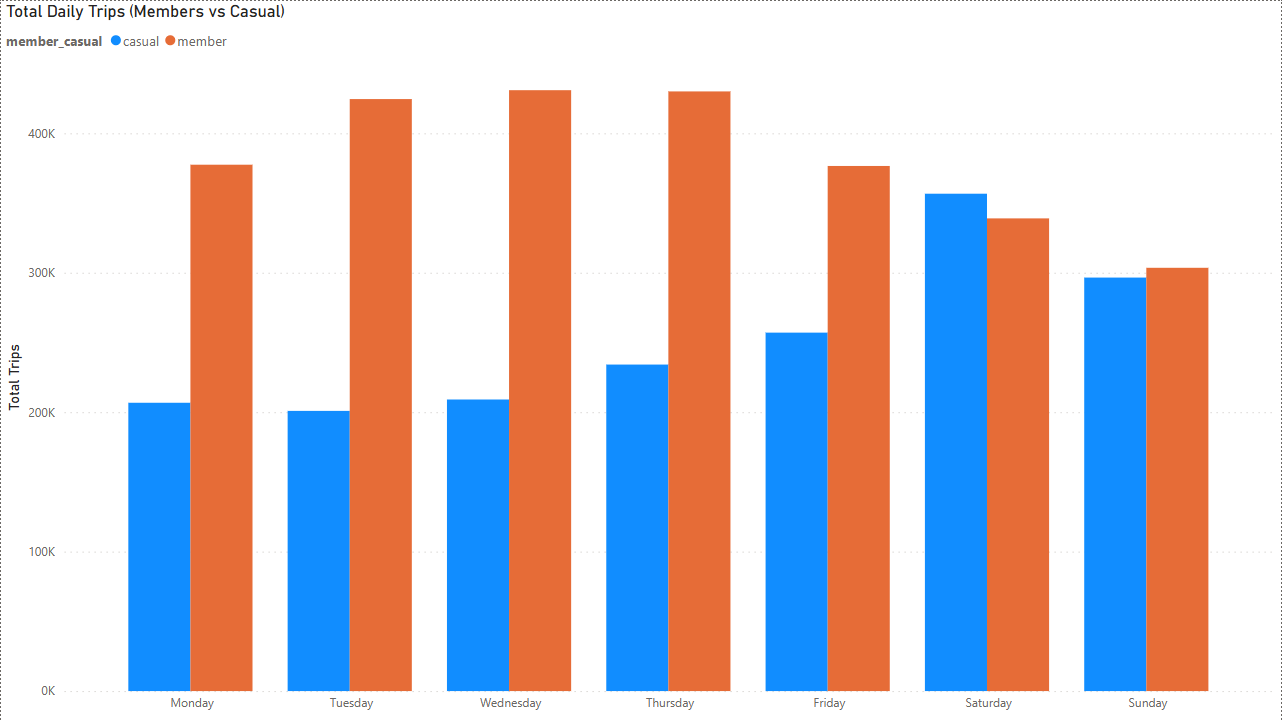

#### Total Daily Trips 

1. Casual riders are **more likely to use bikes during the weekend** (Saturday & Sunday) compared to the weekdays. This may suggest that casual riders are performing activities of leisure or recreation. 
2. Members are **more likely to use bikes during the weekday** (Monday - Friday) compared to the weekends. This may suggest that members are commuting to and from work or school. 

### 5.2 Dashboard
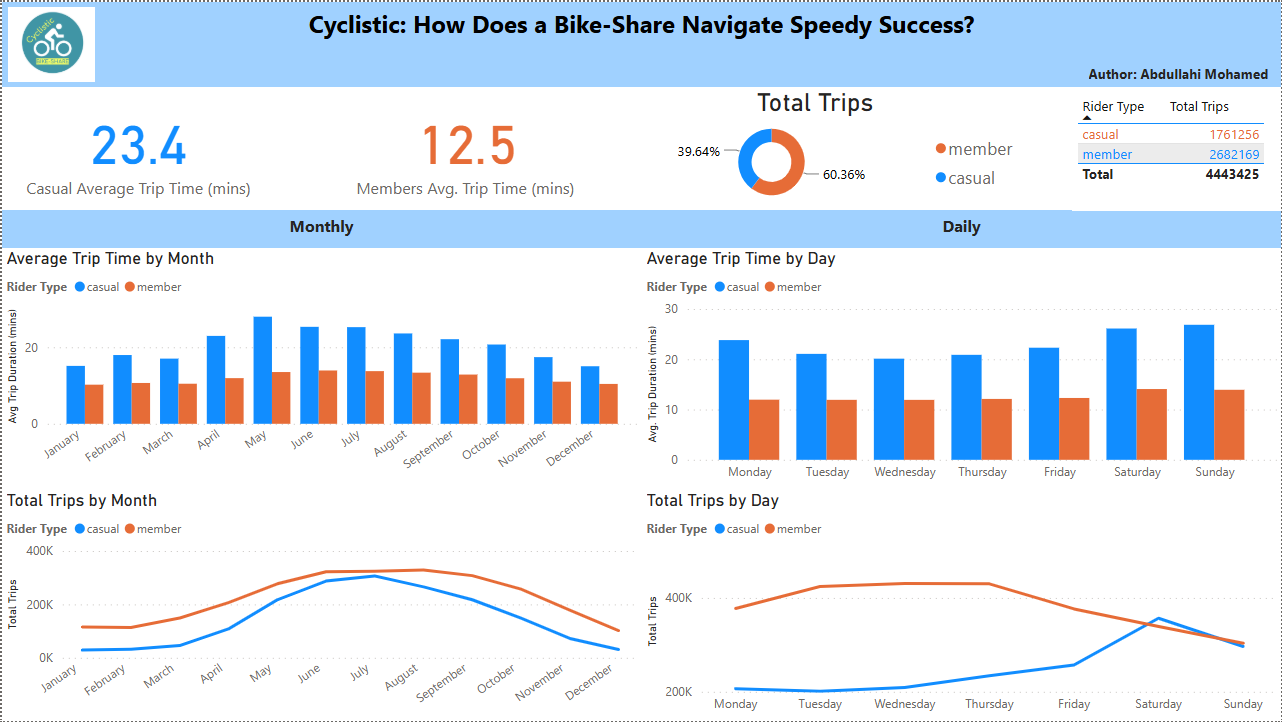

### STEP 6: Act

#### 6.1 Revist Business Objectives

**1. How do annual members and casual riders use Cyclistic bikes differently?**

Annual members typically use Cyclistic bikes during the weekday compared to casual riders that typically use bikes during the weekend. Using bikes during the weekday may suggest commuting to and from work or school. Bike use during the weekend may suggest recreational or leisure activities. Casual riders also had longer bike trips on average compared to annual members. Longer bike trips may support the suggestion of recreational or leisure activities as these riders are more flexible with the length of their trips. Annual members make up 60% of all Cyclistic bike riders compared to 40% for casual riders. 

**2. Why would casual riders buy Cyclistic annual memberships?**

Casual riders would buy Cyclistic annual memberships if they believe it fits well with their lifestlye. A barrier stopping casual riders from buying annual memberships is the 1 year commitment. Casual riders are more likely to use Cyclistic bikes on the weekends and in the summer months so a 1 year membership may not fit with their lifestyle. A suggestion would be to offer memberships at varying lengths to appeal to a broader section of casual riders. Introducing membership lengths of 1 month, 3 months, and 6 months may convert some casual riders to members and removed the barrier of a 1 year commitment. 

**3. How can Cyclistic use digital media to influence casual riders to become members?**

Cyclistic can use social media influencers to promote their annual memberships to their casual riders. Social media influencers have large followings and are great at promoting services to their fans. A campaign centered around social media influencers will likely increase the traffic and engagement of Cyclistic bikes. 

### 6.2 Recommendations 

Here are my top three recommendations for the marketing team to inform their next campaign: 

1. Offer membership at different lengths (1 month, 3 months, and 6 months) to convert more casual riders to members.
2. Partner with social media influencers to promote the annnual membership to casual riders.
3. Improve the membership experience. Create incentives for casual riders to become members. This can include a reward system or member-exclusive events. 